**La "atención" en el Transformador**

Q: ¿Qué estoy buscando?

K: ¿Qué puedo ofrecer?

𝖵: ¿Qué estoy ofreciendo realmente?

Obtenido de: https://youtu.be/QCJQG4DuHT0?si=CAbjxpjhHXVPWmVH


In [1]:
import numpy as np
import math

In [2]:
L, d_k, d_v = 4, 8, 8
q = np.random.rand(L, d_k)
k = np.random.rand(L, d_k)
v = np.random.rand(L, d_v)

In [3]:
print("Q\n", q)
print("K\n", k)
print("V\n", v)

Q
 [[0.67467034 0.63591155 0.78076355 0.37165776 0.78161471 0.18168915
  0.34950731 0.23567877]
 [0.00204327 0.00967813 0.64272917 0.08030324 0.95089966 0.18286713
  0.3395656  0.4158503 ]
 [0.91874613 0.94182648 0.24212919 0.42333076 0.11958887 0.58769688
  0.44435769 0.69303875]
 [0.0274615  0.41911077 0.08907829 0.27731209 0.82840452 0.06301105
  0.29060835 0.54452906]]
K
 [[0.00824096 0.89800689 0.52859865 0.73435824 0.20848143 0.47535881
  0.43258339 0.76969665]
 [0.75573269 0.69437434 0.28655571 0.51416014 0.79159488 0.77601875
  0.23542097 0.58823663]
 [0.01199282 0.15336792 0.65555164 0.58490446 0.8130155  0.68906628
  0.04302335 0.52869623]
 [0.27625469 0.15373122 0.473167   0.04048651 0.01877469 0.05802278
  0.28792197 0.57754457]]
V
 [[0.33678107 0.08635646 0.54500346 0.75331249 0.32626688 0.57976642
  0.3635004  0.50329662]
 [0.02906135 0.71811985 0.45309515 0.50412117 0.22595773 0.77496156
  0.25405523 0.01868846]
 [0.27280635 0.2809407  0.72823786 0.31336794 0.40083223 0.

**Self Attention**

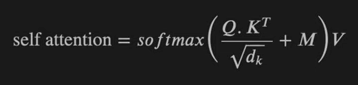


In [5]:
np.matmul(q, k.T)

array([[1.84416529, 2.34688759, 1.73513493, 0.93058148],
       [1.15956642, 1.45292571, 1.60339217, 0.6758255 ],
       [2.32215392, 2.69836156, 1.44951498, 1.09484894],
       [1.3748181 , 1.5732678 , 1.30252189, 0.54276452]])

In [6]:
#Why we need sqrt(d_k) in denominator
q.var(), k.var(), np.matmul(q, k.T).var()

(0.08373109260562195, 0.07757403461815696, 0.3298491543987988)

In [7]:
scaled = np.matmul(q, k.T)/math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(0.08373109260562195, 0.07757403461815696, 0.04123114429984985)

In [8]:
scaled

array([[0.65201089, 0.82975006, 0.61346284, 0.32901024],
       [0.40996864, 0.51368681, 0.56688474, 0.2389404 ],
       [0.82100539, 0.95401488, 0.51248094, 0.38708755],
       [0.4860716 , 0.55623417, 0.46051103, 0.19189624]])

**Masking**

Esto asegura que las palabras no obtenga contexto de lo generado en el futuro.

No se requiere en el encoder, pero si en el decoder.

In [12]:
mask = np.tril(np.ones((L, L)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [13]:
mask[mask == 0] = -np.infty
mask[mask == 1] = 0
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [17]:
scaled + mask

array([[0.65201089,       -inf,       -inf,       -inf],
       [0.40996864, 0.51368681,       -inf,       -inf],
       [0.82100539, 0.95401488, 0.51248094,       -inf],
       [0.4860716 , 0.55623417, 0.46051103, 0.19189624]])

**Softmax**

In [18]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [19]:
attention = softmax(scaled + mask)
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.47409368, 0.52590632, 0.        , 0.        ],
       [0.34760956, 0.39706079, 0.25532965, 0.        ],
       [0.26367194, 0.28283629, 0.25701774, 0.19647404]])

In [20]:
new_v = np.matmul(attention, v)
new_v

array([[0.33678107, 0.08635646, 0.54500346, 0.75331249, 0.32626688,
        0.57976642, 0.3635004 , 0.50329662],
       [0.17494932, 0.41860482, 0.4966683 , 0.6222612 , 0.27351366,
        0.68242078, 0.30594249, 0.24843812],
       [0.19826299, 0.38688806, 0.55529545, 0.5420375 , 0.30547679,
        0.5798241 , 0.31931789, 0.35434514],
       [0.20264408, 0.32046081, 0.62827944, 0.55233161, 0.31462644,
        0.58105802, 0.43869039, 0.4104563 ]])

In [21]:
v

array([[0.33678107, 0.08635646, 0.54500346, 0.75331249, 0.32626688,
        0.57976642, 0.3635004 , 0.50329662],
       [0.02906135, 0.71811985, 0.45309515, 0.50412117, 0.22595773,
        0.77496156, 0.25405523, 0.01868846],
       [0.27280635, 0.2809407 , 0.72823786, 0.31336794, 0.40083223,
        0.27644615, 0.36065653, 0.673537  ],
       [0.18072965, 0.11387734, 0.86146507, 0.66461385, 0.31387853,
        0.70213384, 0.90747038, 0.50568702]])

**Obtenemos:**

In [24]:
def scaled_dot_product_attention(q, k, v, mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention, v)
  return out, attention

In [26]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[0.67467034 0.63591155 0.78076355 0.37165776 0.78161471 0.18168915
  0.34950731 0.23567877]
 [0.00204327 0.00967813 0.64272917 0.08030324 0.95089966 0.18286713
  0.3395656  0.4158503 ]
 [0.91874613 0.94182648 0.24212919 0.42333076 0.11958887 0.58769688
  0.44435769 0.69303875]
 [0.0274615  0.41911077 0.08907829 0.27731209 0.82840452 0.06301105
  0.29060835 0.54452906]]
K
 [[0.00824096 0.89800689 0.52859865 0.73435824 0.20848143 0.47535881
  0.43258339 0.76969665]
 [0.75573269 0.69437434 0.28655571 0.51416014 0.79159488 0.77601875
  0.23542097 0.58823663]
 [0.01199282 0.15336792 0.65555164 0.58490446 0.8130155  0.68906628
  0.04302335 0.52869623]
 [0.27625469 0.15373122 0.473167   0.04048651 0.01877469 0.05802278
  0.28792197 0.57754457]]
V
 [[0.33678107 0.08635646 0.54500346 0.75331249 0.32626688 0.57976642
  0.3635004  0.50329662]
 [0.02906135 0.71811985 0.45309515 0.50412117 0.22595773 0.77496156
  0.25405523 0.01868846]
 [0.27280635 0.2809407  0.72823786 0.31336794 0.40083223 0.